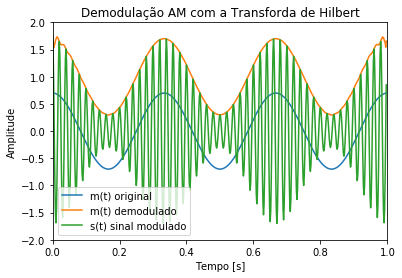

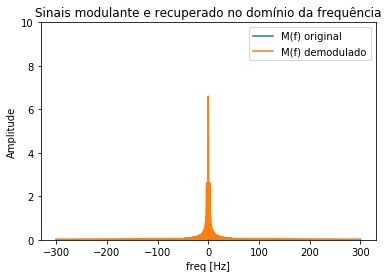

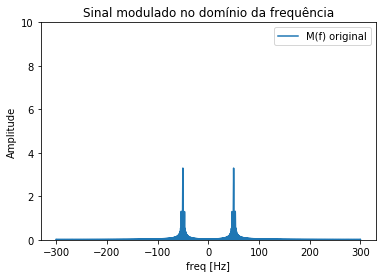

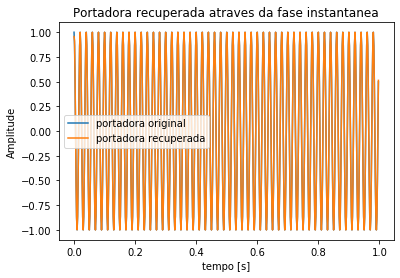

In [2]:
import numpy as np
from scipy.signal import hilbert
import matplotlib.pyplot as plt
import scipy.fftpack as ff
## parametros da modulacao AM-DSB
fs = 600
t = np.arange(0,1-1/fs,1/fs)
fm = 3
fc = 50
indice = 0.7
portadora = np.cos(2*np.pi*t*fc)
sinal_modulante = indice*np.cos(2*np.pi*fm*t)
sinal_modulado = (1 + indice*np.cos(2*np.pi*fm*t))*portadora
## utilizando a transformada de hilbert para trabalhar com sinais analiticos
sinal_analitico = hilbert(sinal_modulado)
inst_phase = np.unwrap(np.angle(sinal_analitico))

sinal_recuperado = np.abs(sinal_analitico)
portadora_recuperada = np.cos(inst_phase)


plt.title('Demodulação AM com a Transforda de Hilbert')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.plot(t,sinal_modulante,t,sinal_recuperado,t,sinal_modulado)
plt.ylim([-2,2])
plt.xlim([0,1])
plt.legend(['m(t) original','m(t) demodulado','s(t) sinal modulado'])
plt.show()

## trabalhando com sinais no dominio da Frequencia
lfft = len(t)*10
lfft = int(2**np.ceil(np.log2(lfft)))
modulante_fft = ff.fftshift(ff.fft(sinal_modulante,lfft,axis=0)/np.sqrt(lfft))
modulante_fft=np.abs(modulante_fft)
recuperado_fft = ff.fftshift(ff.fft(sinal_recuperado,lfft,axis=0)/np.sqrt(lfft))
recuperato_fft = np.abs(recuperado_fft)
modulado_fft = ff.fftshift(ff.fft(sinal_modulado,lfft,axis=0)/np.sqrt(lfft))
modulado_fft = np.abs(modulado_fft)

freq = np.arange(-lfft/2,lfft/2,1)/(lfft/fs)

plt.title('Sinais modulante e recuperado no domínio da frequência')
plt.xlabel('freq [Hz]')
plt.ylabel('Amplitude')
plt.plot(freq,modulante_fft,freq,np.abs(recuperado_fft))
plt.ylim([0,10])
plt.legend(['M(f) original','M(f) demodulado'])
plt.show()

plt.title('Sinal modulado no domínio da frequência')
plt.xlabel('freq [Hz]')
plt.ylabel('Amplitude')
plt.plot(freq,np.abs(modulado_fft))
plt.ylim([0,10])
plt.legend(['M(f) original','M(f) demodulado'])
plt.show()


plt.title('Portadora recuperada atraves da fase instantanea')
plt.xlabel('tempo [s]')
plt.ylabel('Amplitude')
plt.plot(t,portadora,t,np.cos(inst_phase))
plt.legend(['portadora original','portadora recuperada'])
plt.show()


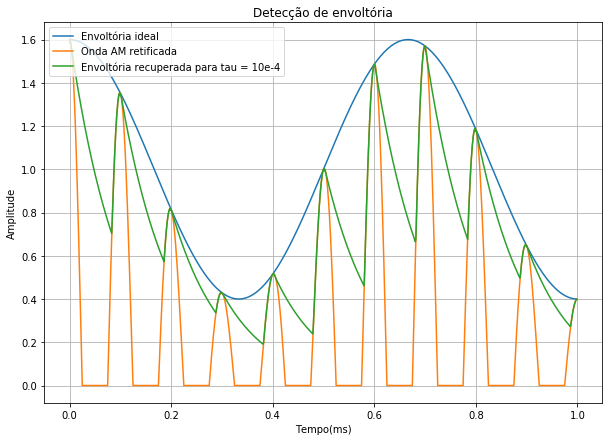

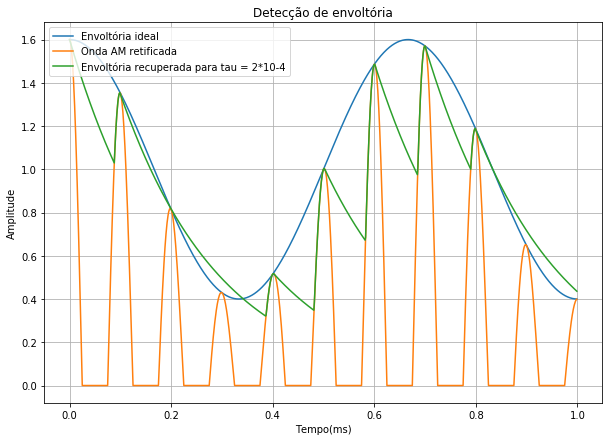

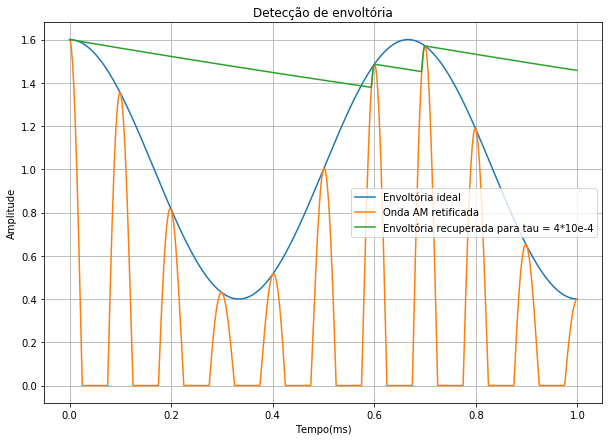

o erro quadratico medio para tau = 1e-4 é :  0.12675071588126158
o erro quadratico medio para tau = 2e-4 é :  0.05369464871735894
o erro quadratico medio para tau = 4e-4 é :  0.4101990651124004


In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack

tau1 = 1e-4                                                      # Constante de tempo do detector de envelope
tau2 = 2e-4
tau3 = 4e-3
Ts=1e-6                                                         # Definição do período
t = np.arange(1000)*Ts                                          # Definição do vetor tempo
fc = 10000                                                      # Frequência da portadora.
fm = 1500                                                       # Frequência do sinal
Mu = 0.6                                                        # Índice de modulaçao.
Ac = 1.0
x_AMo = Ac*(1.0+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t);  # Onda Modulada AM-DSB

x_envIdeal = np.abs(Ac*(1.0+Mu*np.cos(2*np.pi*fm*t)))           # Envoltória ideal

# Detector de envoltória
x_AM = x_AMo*(x_AMo>0)                                          # Efeito do diodo (semiciclo positivo)
x_env1 = np.zeros(len(x_AM))
x_env2 = np.zeros(len(x_AM))
x_env3 = np.zeros(len(x_AM))
Ns = len(x_AM)
out1 = -1
out2 = -1
out3 = -1
for i in range(Ns):
    inp = x_AM[i]
    if inp>=out1:
        out1 = inp            # Caso 1: x_am(t) > Vc(t) (carga do capacitor)
    else:
        out1 *= (1-Ts/tau1)    # Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
    if inp>=out2:
        out2 = inp
    else:
        out2 *= (1-Ts/tau2)
    if inp>=out3:
        out3 = inp
    else:
        out3 *= (1-Ts/tau3)
    x_env1[i] = out1
    x_env2[i] = out2
    x_env3[i] = out3

# gráfico composto
plt.figure(1,[10,7])
plt.title("Detecção de envoltória")
plt.ylabel("Amplitude")
plt.xlabel("Tempo(ms)")
envoltoria_ideal = plt.plot(t*1000,x_envIdeal)
sinal_transmitido = plt.plot(t*1000,x_AM)
detector_de_saida = plt.plot(t*1000,x_env1)
plt.grid()
plt.legend(["Envoltória ideal","Onda AM retificada","Envoltória recuperada para tau = 10e-4"])
plt.show()

plt.figure(1,[10,7])
plt.title("Detecção de envoltória")
plt.ylabel("Amplitude")
plt.xlabel("Tempo(ms)")
envoltoria_ideal = plt.plot(t*1000,x_envIdeal)
sinal_transmitido = plt.plot(t*1000,x_AM)
detector_de_saida = plt.plot(t*1000,x_env2)
plt.grid()
plt.legend(["Envoltória ideal","Onda AM retificada","Envoltória recuperada para tau = 2*10-4"])
plt.show()

plt.figure(1,[10,7])
plt.title("Detecção de envoltória")
plt.ylabel("Amplitude")
plt.xlabel("Tempo(ms)")
envoltoria_ideal = plt.plot(t*1000,x_envIdeal)
sinal_transmitido = plt.plot(t*1000,x_AM)
detector_de_saida = plt.plot(t*1000,x_env3)
plt.grid()
plt.legend(["Envoltória ideal","Onda AM retificada","Envoltória recuperada para tau = 4*10e-4"])
plt.show()

plt.show()


erroQuad1 = 0;
erroQuad2 = 0;
erroQuad3 = 0;

for i in range(Ns):
    inp = x_envIdeal[i]
    inp1 = x_env1[i]
    inp2 = x_env2[i]
    inp3 = x_env3[i]
    erroQuad1 = erroQuad1 + ((inp - inp1)**2)/Ns
    erroQuad2 = erroQuad2 + ((inp - inp2)**2)/Ns
    erroQuad3 = erroQuad3 + ((inp - inp3)**2)/Ns

print('o erro quadratico medio para tau = 1e-4 é : ',erroQuad1)
print('o erro quadratico medio para tau = 2e-4 é : ',erroQuad2)
print('o erro quadratico medio para tau = 4e-4 é : ',erroQuad3)
    

a potencia da sub modulacao e :  2.249999999999999
a potencia da modulacao ideal e :  2.9999999999999982
a potencia da sobre modulacao e :  5.9999999999999964
a potencia da sub modulacao e :  3.0000000000000826
a potencia da modulacao ideal e :  4.0000000000000995
a potencia da sobre modulacao e :  6.0000000000001465


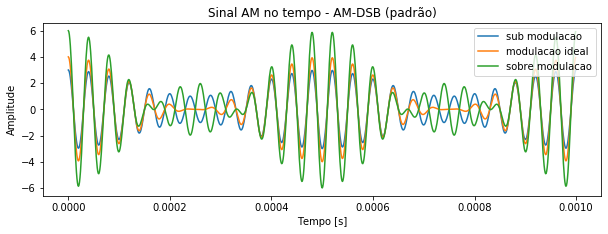

In [3]:


# Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

# Parâmetros do sinal
Ac = 2                                                         # Amplitude da portadora
Mu1 = 0.5                                                       # Índice de modulação
Mu2 = 1
Mu3 = 2
fc = 25000                                                     # Frequência da portadora Hz
fm = 2000
N = 1000
Ts = 1e-6                                                      # Tempo de amostragem pequeno (modelar sinal contínuo)
t = np.arange(N)*Ts
s1 = Ac*(1+Mu1*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)
s2 = Ac*(1+Mu2*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)
s3 = Ac*(1+Mu3*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)

# Cálculo da FFT de AM-DSB
lfft = 30                                                      # Número pontos da fft
k = np.arange(-lfft,lfft)                                      # Vetor de frequências 
S1_f = np.abs((fftpack.fft(s1)))/N                           # Cálculo da FFT
S2_f = np.abs((fftpack.fft(s2)))/N 
S3_f = np.abs((fftpack.fft(s3)))/N 
Ns = len(s1)                                                    # Comprimento do sinal modulado
Nk = len(k)                                                    # Comprimento do sinal em frequência

# A fft em 30 pontos (para melhor visualização)
S_f1_new = np.zeros(Nk)                                         # Inicialização do vetor da frequência
S_f2_new = np.zeros(Nk) 
S_f3_new = np.zeros(Nk) 
fsampling = 1/Ts                                               # Taxa de amostragem
freq = (fsampling/Ns)*k                                        # Eixo de frequências


# Gráfico do AM-DSB no tempo
plt.figure(1,[10,7])
plt.subplot(211)
plt.plot(t,s1)
plt.plot(t,s2)
plt.plot(t,s3)
plt.title("Sinal AM no tempo - AM-DSB (padrão)")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.legend(["sub modulacao","modulacao ideal","sobre modulacao"])


Power1=0
Power2=0
Power3=0
for i in range(Nk):
    Power1 = Power1 + S1_f[i]+np.conj(S1_f[i])
    Power2 = Power2 + S2_f[i]+np.conj(S2_f[i])
    Power3 = Power3 + S3_f[i]+np.conj(S3_f[i])
    
print('a potencia da sub modulacao e : ', np.sum(S1_f*np.conj(S1_f)))
print('a potencia da modulacao ideal e : ', np.sum(S2_f*np.conj(S2_f)))
print('a potencia da sobre modulacao e : ', np.sum(S3_f*np.conj(S3_f)))
print('a potencia da sub modulacao e : ', Power1)
print('a potencia da modulacao ideal e : ', Power2)
print('a potencia da sobre modulacao e : ', Power3)
